<a href="https://colab.research.google.com/drive/1GqIBFNlSYyIyjvvD4pVO1kjE_xd__b52#scrollTo=kKLUiqGIHn5u" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Melhores Chutadores no Campeonato Brasileiro 2023 

## Introdução

Neste projeto, realizamos uma análise detalhada dos dados do Campeonato Brasileiro 2023 para identificar os melhores chutadores da competição, com foco principal na distância média dos chutes. Além disso, consideramos critérios como a quantidade de gols, Expected Goals (xG), total de chutes e xG por chute.

## Metodologia

1. **Coleta de Dados:** Utilizamos os dados reais do Campeonato Brasileiro 2023 fornecidos pela Opta, via FutMob, incluindo informações sobre rodadas, jogadores, partidas, gols marcados, distância média dos chutes e outras estatísticas relevantes.

2. **Cálculo das Métricas:** Calculamos as seguintes métricas para cada jogador:
   - **Gols:** Número total de gols marcados por cada jogador ao longo do campeonato.
   - **Expected Goals (xG):** Uma estimativa de probabilidade de um chute resultar em gol, considerando diversas variáveis.
   - **Total de Chutes:** Número total de chutes a gol feitos por cada jogador.
   - **Distância Média dos Chutes:** Média da distância dos chutes a gol para cada jogador.
   - **xG por Chute:** Média de Expected Goals por chute realizado.

3. **Seleção dos Melhores Chutadores:** Levando em consideração a distância média dos chutes e as métricas mencionadas acima, identificamos os 6 melhores chutadores do campeonato.


In [1]:
#Importar as bibliotecas

import json
import re
import csv
from time import sleep
import time
import urllib
import os

from lxml import etree

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import RegularPolygon
from matplotlib import cm
from PIL import Image

from mplsoccer import VerticalPitch

import pprint

from IPython.display import clear_output
from ScraperFC.shared_functions import *
import json
import os
import random

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Rodada para a análise 
r = 20  # Rodada
resultados = []
p = 0

In [3]:
#Carregamento dos Dados
new_df = pd.read_json('dados.json')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   general        200 non-null    object
 1   header         200 non-null    object
 2   nav            200 non-null    object
 3   ongoing        200 non-null    bool  
 4   hasPendingVAR  200 non-null    bool  
 5   content        200 non-null    object
 6   seo            200 non-null    object
dtypes: bool(2), object(5)
memory usage: 8.3+ KB


In [4]:
# Renomear as colunas
new_df = new_df.rename(columns=lambda x: x.replace('.', '_'))

In [5]:
#Verificação do DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   general        200 non-null    object
 1   header         200 non-null    object
 2   nav            200 non-null    object
 3   ongoing        200 non-null    bool  
 4   hasPendingVAR  200 non-null    bool  
 5   content        200 non-null    object
 6   seo            200 non-null    object
dtypes: bool(2), object(5)
memory usage: 8.3+ KB


In [3]:
# Lista de chaves a serem removidas

chaves_remover = ['h2h', 'matchesInRound', 'poll', 'insights', 'topScorers', 'countryCode',
                  'QAData', 'liveticker', 'buzz', 'playoff', 'table', 'teams',
                  'tournamentNameForUrl', 'parentLeagueId', 'parentLeagueName',
                  'isCurrentSeason', 'parentLeagueSeason', 'countryCode']

# Percorrer todas as linhas do DataFrame
for index, row in new_df.iterrows():
    # Verificar se a coluna 'content' contém um dicionário
    if isinstance(row['content'], dict):
        # Remover as chaves da lista 'chaves_remover' do dicionário
        for chave in chaves_remover:
            if chave in row['content']:
                del row['content'][chave]

In [4]:
# Lista de colunas a serem removidas
colunas_remover = ['nav', 'ongoing', 'hasPendingVAR', 'general_teamColors_lightMode_home',
                   'general_teamColors_lightMode_away', 'general_teamColors_fontDarkMode_home',
                   'general_teamColors_fontDarkMode_away', 'general_teamColors_fontLightMode_home',
                   'general_teamColors_fontLightMode_away', 'general_started', 'general_finished',
                   'header_status_utcTime', 'header_status_finished', 'header_status_started',
                   'header_status_cancelled', 'header_status_reason_short', 'header_status_reason_shortKey',
                   'header_status_reason_long', 'header_status_reason_longKey',
                   'content_matchFacts_poll_oddspoll_Facts', 'content_matchFacts_poll_oddspoll_PollName',
                   'content_matchFacts_poll_oddspoll_MatchId', 'seo_faqJSONLD_mainEntity',
                   'seo_faqJSONLD_@type', 'seo_faqJSONLD_@context', 'seo_breadcrumbJSONLD',
                   'seo_eventJSONLD_performer', 'seo_eventJSONLD_offers_priceCurrency',
                   'seo_eventJSONLD_offers_price', 'seo_eventJSONLD_offers_availability',
                   'seo_eventJSONLD_offers_url', 'seo_eventJSONLD_offers_@type',
                   'seo_eventJSONLD_organizer_logo', 'seo_eventJSONLD_organizer_url',
                   'seo_eventJSONLD_organizer_name', 'seo_eventJSONLD_organizer_@type',
                   'seo_eventJSONLD_image', 'seo_eventJSONLD_location_url',
                   'seo_eventJSONLD_location_@type', 'seo_eventJSONLD_eventAttendanceMode',
                   'seo_eventJSONLD_eventStatus', 'seo_eventJSONLD_endDate', 'seo_eventJSONLD_startDate',
                   'seo_eventJSONLD_description', 'seo_eventJSONLD_name', 'seo_eventJSONLD_awayTeam_url',
                   'seo_eventJSONLD_awayTeam_logo', 'seo_eventJSONLD_awayTeam_sport',
                   'seo_eventJSONLD_awayTeam_name', 'seo_eventJSONLD_awayTeam_@type',
                   'seo_eventJSONLD_awayTeam_@context', 'seo_eventJSONLD_homeTeam_url',
                   'seo_eventJSONLD_homeTeam_logo', 'seo_eventJSONLD_homeTeam_sport',
                   'seo_eventJSONLD_homeTeam_name', 'seo_eventJSONLD_homeTeam_@type',
                   'seo_eventJSONLD_homeTeam_@context', 'seo_eventJSONLD_sport', 'seo_eventJSONLD_@type',
                   'seo_eventJSONLD_@context', 'seo_path', 'content_matchFacts_momentum_main_debugTitle']

# Iterar em todas as linhas do DataFrame
for index, row in new_df.iterrows():
    # Remover as colunas da lista 'colunas_remover'
    new_df.loc[index, colunas_remover] = pd.NA

# Remover as colunas com valores NA
new_df = new_df.dropna(axis=1, how='all')

In [5]:
#Testando a estrutura
new_df.content[189]['shotmap']

{'shots': [{'id': 2580544957,
   'eventType': 'AttemptSaved',
   'teamId': 10273,
   'playerId': 954213,
   'playerName': 'Caca',
   'x': 90.4,
   'y': 39.208809525,
   'min': 8,
   'minAdded': None,
   'isBlocked': True,
   'isOnTarget': True,
   'blockedX': 92.3,
   'blockedY': 38.368333335,
   'goalCrossedY': 33.695,
   'goalCrossedZ': 1.219999994,
   'expectedGoals': 0.053524609655141005,
   'expectedGoalsOnTarget': None,
   'shotType': 'RightFoot',
   'situation': 'RegularPlay',
   'period': 'FirstHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 1.08068783068783,
    'y': 0.322751321164021,
    'zoomRatio': 1},
   'firstName': '',
   'lastName': 'Caca',
   'fullName': 'Caca',
   'teamColor': '#982020'},
  {'id': 2580545033,
   'eventType': 'Miss',
   'teamId': 10273,
   'playerId': 840212,
   'playerName': 'Agustin Canobbio',
   'x': 79.3315533992,
   'y': 34.61,
   'min': 9,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': False,
   'blockedX': None,
   'blockedY'

In [6]:
#Criar um dicionário para todos os eventos de cada jogo
total_jogos = len(new_df.content)

jogo = 0
todos_os_dicionarios = []

while jogo < total_jogos:
    tamanho = len(new_df.content[jogo]['shotmap']['shots'])
    eventos = []
    jogo_id = new_df.content[jogo]['matchFacts']['matchId']  # Obter o ID do jogo

    for i in range(tamanho):
        evento = new_df.content[jogo]['shotmap']['shots'][i]
        evento['matchId'] = jogo_id  # Adicionar o ID do jogo ao dicionário do evento
        eventos.append(evento)

    todos_os_dicionarios.extend(eventos)

    jogo += 1

df_resultado = pd.DataFrame(todos_os_dicionarios)

In [7]:
#Verificando novamente o DF
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5412 non-null   int64  
 1   eventType              5412 non-null   object 
 2   teamId                 5412 non-null   int64  
 3   playerId               5412 non-null   int64  
 4   playerName             5412 non-null   object 
 5   x                      5412 non-null   float64
 6   y                      5412 non-null   float64
 7   min                    5412 non-null   int64  
 8   minAdded               852 non-null    float64
 9   isBlocked              5412 non-null   bool   
 10  isOnTarget             5412 non-null   bool   
 11  blockedX               3073 non-null   float64
 12  blockedY               3073 non-null   float64
 13  goalCrossedY           5412 non-null   float64
 14  goalCrossedZ           5412 non-null   float64
 15  expe

In [8]:
#Criando a extrutura para plotar a VIZ
goleadores_data = []  # Lista para armazenar os dicionários

for index, row in df_resultado.iterrows():
    goleador = {
        'teamId': row['teamId'],
        'playerId': row['playerId'],
        'playerName': row['playerName'],
        'min': row['min'],
        'xG': row['expectedGoals'],
        'teamColor': row['teamColor'],
        'eventType': row['eventType'],
        'match_id': row['matchId'],
        'isOwnGoal': row['isOwnGoal'],
        'x': row['x'],
        'y': row['y'],
        'situation': row['situation'],
        'teamName': row['teamId'],  
    }
    goleadores_data.append(goleador)

# Criando o DataFrame a partir da lista de dicionários
goleadores = pd.DataFrame(goleadores_data)


In [9]:
#Verificando....
goleadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   teamId      5412 non-null   int64  
 1   playerId    5412 non-null   int64  
 2   playerName  5412 non-null   object 
 3   min         5412 non-null   int64  
 4   xG          5400 non-null   float64
 5   teamColor   5412 non-null   object 
 6   eventType   5412 non-null   object 
 7   match_id    5412 non-null   int64  
 8   isOwnGoal   5412 non-null   bool   
 9   x           5412 non-null   float64
 10  y           5412 non-null   float64
 11  situation   5412 non-null   object 
 12  teamName    5412 non-null   int64  
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 512.8+ KB


In [10]:
#Carregando as fontes e o estilo do relatório
font_path = r"fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "otf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("stylesheets\soc_base.mplstyle")
plt.rcParams['font.family'] = 'Nippo'

In [11]:
#Filtrando e excluindo os penalts
goleadores = goleadores[goleadores['situation'] != 'Penalty'].reset_index(drop=True)
goleadores.head(5)

,teamId,playerId,playerName,min,xG,teamColor,eventType,match_id,isOwnGoal,x,y,situation,teamName
0,9862,202104,Vinicius,4,0.048895,#1e672e,AttemptSaved,4123624,False,87.319118,37.050000,RegularPlay,9862
1,9862,265113,Sidimar Fernando Cigolini,12,0.205855,#1e672e,AttemptSaved,4123624,False,100.258621,37.744000,FromCorner,9862
2,10273,535597,Pedro Henrique,17,0.022503,#982020,Miss,4123624,False,93.400000,34.076250,FromCorner,10273
3,9862,202104,Vinicius,18,0.021271,#1e672e,AttemptSaved,4123624,False,77.529612,50.026242,RegularPlay,9862
4,9862,951710,Ze Ricardo,33,0.017193,#1e672e,AttemptSaved,4123624,False,80.232524,19.304968,RegularPlay,9862


In [12]:
#Verifica se um chute está dentro das dimensões da nossa área.
def is_inside_box(x,y):
    if (x >= 13.84) & (x <= 54.16) & (y >=88.5):
        return True
    else:
        return False

In [13]:
# Nós invertemos os dados porque estamos analisando um Campo Vertical.
goleadores['is_in_box'] = [is_inside_box(x,y) for x,y in zip(goleadores['y'], goleadores['x'])]
data_groupped = goleadores.groupby(['playerId', 'playerName', 'teamId', 'is_in_box'])['min'].count().reset_index()

In [14]:
#Pivotar os dados e corrigir os valores ausentes
data_groupped = data_groupped.pivot(columns='is_in_box', index=['playerId', 'playerName', 'teamId'], values='min').reset_index()
data_groupped.columns = ['playerId', 'playerName', 'teamId', 'False', 'True']
data_groupped.fillna(0, inplace=True)

In [15]:
# Calcula o total de chutes e a proporção de chutes na área
data_groupped['total'] = data_groupped['False'] + data_groupped['True']
data_groupped['share'] = data_groupped['True']/data_groupped['total']

In [24]:
# Seleciona e exibe os 6 principais jogadores com base no total de chutes
data_groupped = (
    data_groupped
    .sort_values(by='total', ascending=False)
    .head(6)
)
data_groupped

,playerId,playerName,teamId,False,True,total,share
3,20276,Hulk,10272,51.0,15.0,66.0,0.227273
13,40636,Luis Suárez,9769,24.0,34.0,58.0,0.586207
282,857176,Paulinho,10272,7.0,42.0,49.0,0.857143
221,683709,Bruno Rodrigues,9781,29.0,18.0,47.0,0.382979
26,113616,German Cano,9863,16.0,30.0,46.0,0.652174
195,614970,Tiquinho Soares,8517,12.0,34.0,46.0,0.739130


In [25]:
# Filtra os dados dos principais goleadores com base nos jogadores do DataFrame 'data_groupped'
goleadores = goleadores[goleadores['playerId'].isin(data_groupped['playerId'])].reset_index(drop=True)

In [26]:
# Define uma paleta de cores personalizada para visualizações
colors = [
    '#d0d6d4', '#c5d0cd', '#bbcac7', '#b0c3c1', '#a6bdbb',
    '#9bb7b5', '#91b1af', '#86aaa8', '#7ca4a2', '#719e9c',
    '#679896', '#5c9190', '#528b8a', '#478583', '#3d7f7d',
    '#327877', '#287271',
]

# Cria um mapa de cores linear segmentado chamado 'SOC' usando a paleta definida
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', colors, N=50)

# Registra o mapa de cores personalizado com o nome 'SOC'
cm.register_cmap(name='SOC', cmap=soc_cm)


ValueError: A colormap named "SOC" is already registered.

In [27]:
import numpy as np

# Função para gerar as coordenadas de uma semicircunferência
def semicircle(r, h, k):
    x0 = h - r  # Determina o ponto de início de x
    x1 = h + r  # Determina o ponto de término de x
    x = np.linspace(x0, x1, 10000)  # Gera muitos pontos para calcular y

    # Utiliza numpy para calcular as coordenadas y da semicircunferência
    y = k - np.sqrt(r**2 - (x - h)**2)
    return x, y


In [28]:
def plot_hexbin_shot(ax, playerId):
    """
    Plota um gráfico hexbin de chutes em um campo de futebol vertical,
    junto com anotações e informações relacionadas aos chutes.

    Parâmetros:
    - ax: Eixo do subplot onde o gráfico será plotado.
    - playerId: ID do jogador para o qual os chutes estão sendo plotados.
    """
     # Cria uma instância do campo de futebol vertical
    pitch = VerticalPitch(
        pitch_type='uefa',
        half=True,
        goal_type='box',
        linewidth=1.25,
        line_color='black',
        pad_bottom=-8,
        pad_top=10
    )
    # Desenha o campo de futebol no eixo
    pitch.draw(ax = ax)
    # Filtra os dados para o jogador específico
    aux_data = goleadores[goleadores['playerId'] == playerId]
    # Plota o gráfico hexbin dos chutes no campo
    bins = pitch.hexbin(x=aux_data['x'], y=aux_data['y'], ax=ax, cmap='SOC', gridsize=(14,14), zorder=-1, edgecolors='#efe9e6', alpha=0.9, lw=.25)
    # Calcula e plota a semicircunferência
    x_circle, y_circle = semicircle(104.8 - aux_data['x'].median(), 34, 104.8)  # function call
    ax.plot(x_circle, y_circle, ls='--', color='red', lw=.75)
    # Anotações relacionadas aos chutes
    annot_x = [54 - x*14 for x in range(0,4)]
    annot_texts = ['goals', 'xG', 'shots', 'xG/shot']
    annot_stats = [aux_data[aux_data['eventType'] == 'Goal'].shape[0], aux_data['xG'].sum(), aux_data.shape[0], aux_data['xG'].sum()/aux_data.shape[0]]
    # Adiciona hexágonos e anotações para estatísticas
    for x,s,stat in zip(annot_x, annot_texts, annot_stats):
        hex_annotation = RegularPolygon((x, 70), numVertices=6, radius=4.5, edgecolor='black', fc='None', hatch='.........', lw=1.25)
        ax.add_patch(hex_annotation)
        ax.annotate(
            xy=(x,70),
            text=s,
            xytext=(0,-14),
            textcoords='offset points',
            size=5,
            ha='center',
            va='center'
        )
        if isinstance(stat, int):
            text_stat = f'{stat:.0f}'
        else:
            text_stat = f'{stat:.2f}'
        text_ = ax.annotate(
            xy=(x,70),
            text=text_stat,
            xytext=(0,0),
            textcoords='offset points',
            size=5,
            ha='center',
            va='center',
            weight='bold'
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='#efe9e6'), path_effects.Normal()]
        )

    # Anotação da distância média
    median_annotation = ax.annotate(
        xy=(34,110),
        xytext=(x_circle[-1], 110),
        text=f"{((105 - aux_data['x'].median())*18)/16.5 * 0.9144:.1f} m.",
        size=4,
        color='red',
        ha='right',
        va='center',
        arrowprops=dict(arrowstyle= '<|-, head_width=0.35, head_length=0.65',
            color='red',
            fc='#efe9e6',
            lw=0.75)
    )
    # Outras anotações
    ax.annotate(
        xy=(34,110),
        xytext=(4,0),
        text=f"distância média",
        textcoords='offset points',
        size=4,
        color='red',
        ha='left',
        va='center',
        alpha=0.5
    )

    ax.annotate(
        xy=(34,114),
        text=f"{aux_data['playerName'].iloc[0].upper()}",
        size=7.5,
        color='black',
        ha='center',
        va='center',
        weight='bold'
    )

    return ax

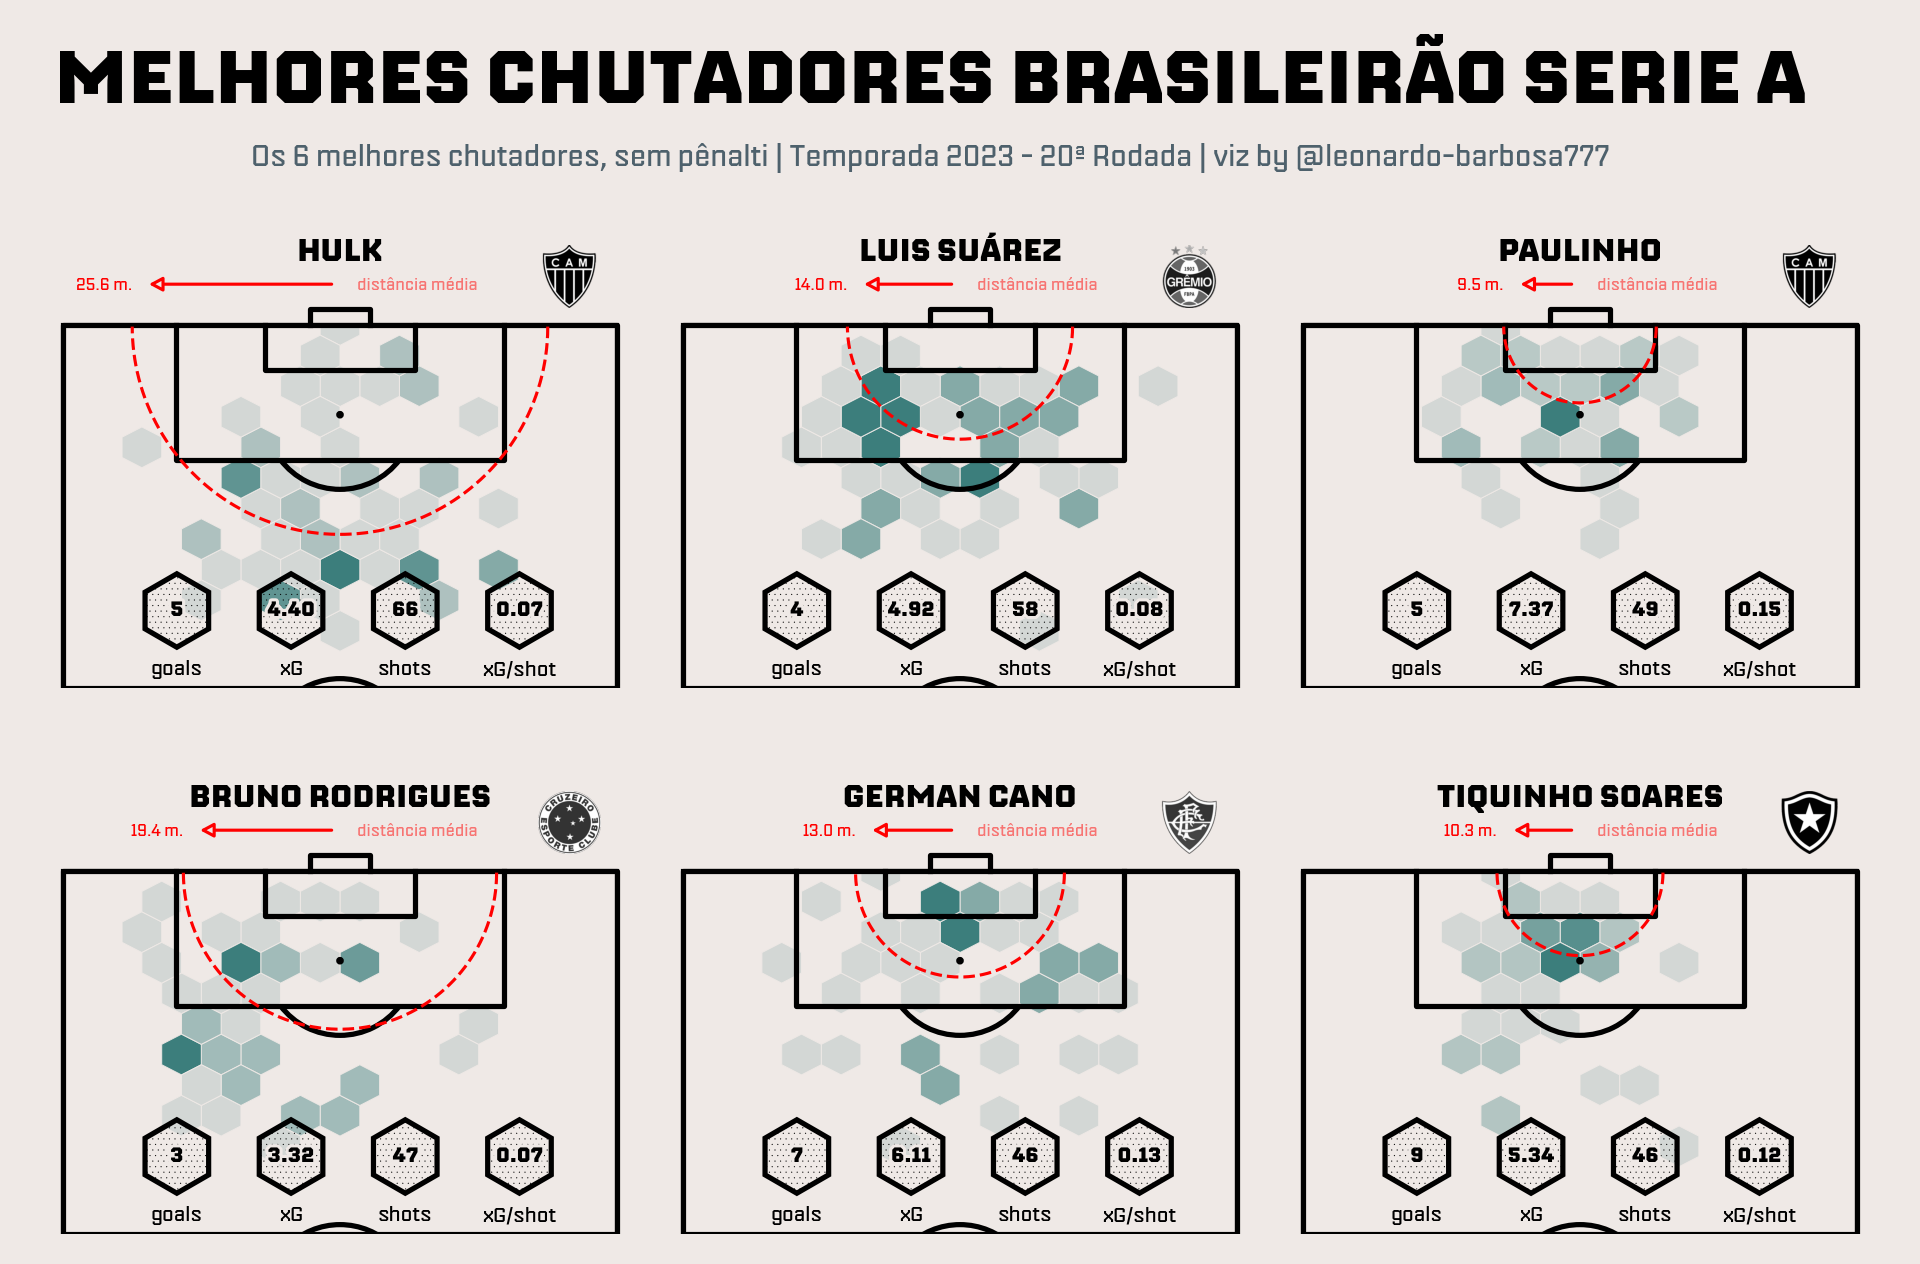

In [30]:
# Cria uma figura com 2 linhas e 3 colunas de subplots, com tamanho e resolução definidos
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,6), dpi=300)
axs = np.array(axs)
plt.rcParams['hatch.linewidth'] = .02

# Loop para plotar os gráficos hexbin para cada jogador nos subplots
for index, ax in enumerate(axs.reshape(-1)):
    plot_hexbin_shot(ax, data_groupped['playerId'].iloc[index])

# Ajusta os espaçamentos entre os subplots
plt.subplots_adjust(wspace=0, hspace=-.35)

# Adiciona os logos dos times aos subplots
for index, ax in enumerate(axs.reshape(-1)):
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((11,98))
    ax_size = 0.035
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{data_groupped["teamId"].iloc[index]:.0f}.png')).convert('LA')
    image_ax.imshow(club_icon)
    image_ax.axis('off')

# Adiciona textos à figura
fig_text(
    x = 0.5, y = .84,
    s = "MELHORES CHUTADORES BRASILEIRÃO SERIE A",
    va = "bottom", ha = "center",
    fontsize = 18, color = "black", font = "Nippo", weight = "bold"
)
fig_text(
    x = 0.5, y = .81,
    s = "Os 6 melhores chutadores, sem pênalti | Temporada 2023 - 20ª Rodada | viz by @leonardo-barbosa777",
    va = "bottom", ha = "center",
    fontsize = 7, color = "#4E616C", font = "Nippo"
)

# Salva a figura em dois formatos diferentes
plt.savefig(
    "top_6_shots_br_23.png", #png
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "top_6_shots_br_23_tr.png", #transparente
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)


## Resultados

Aqui estão os 6 melhores chutadores do Campeonato Brasileiro 2023, na 20ª Rodada, com foco na análise da distância média dos chutes:

1. **HULK**
   - Gols: 5
   - xG: 4.40
   - Total de Chutes: 66
   - Distância Média dos Chutes: 25,6 metros
   - xG por Chute: 0.07

2. **LUIS SUÁREZ**
   - Gols: 4
   - xG: 4.92
   - Total de Chutes: 58
   - Distância Média dos Chutes: 14,0 metros
   - xG por Chute: 0.08

3. **PAULINHO**
   - Gols: 5
   - xG: 7.37
   - Total de Chutes: 49
   - Distância Média dos Chutes: 9,5 metros
   - xG por Chute: 0.15

4. **BRUNO RODRIGUES**
   - Gols: 3
   - xG: 3.32
   - Total de Chutes: 47
   - Distância Média dos Chutes: 19,4 metros
   - xG por Chute: 0.07

5. **GERMAN CANO**
   - Gols: 7
   - xG: 6.11
   - Total de Chutes: 46
   - Distância Média dos Chutes: 13,0 metros
   - xG por Chute: 0.13

6. **TIQUINHO SOARES**
   - Gols: 9
   - xG: 5.34
   - Total de Chutes: 46
   - Distância Média dos Chutes: 10,3 metros
   - xG por Chute: 0.12

## Conclusão

A análise dos dados do Campeonato Brasileiro 2023 destacou, até agora na 20ª rodada, os 6 melhores chutadores, com ênfase na distância média dos chutes, juntamente com critérios como gols marcados, Expected Goals (xG), total de chutes e xG por chute. Esses resultados fornecem insights valiosos sobre os jogadores que se destacaram na competição ao criar oportunidades de gol com chutes precisos e bem colocados.
